In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from catboost.utils import get_confusion_matrix

plt.style.use("seaborn")

In [2]:
# Load train, validation, and test sets
train = pd.read_pickle("../2_FeatureExtraction/data/train.pkl")
test = pd.read_pickle("../2_FeatureExtraction/data/test.pkl")

# Remove id
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)


train.head()

Distance  Result  AX_Range  AX_Max  AX_Min  AX_Last    AX_Mean  \
146         4       0     374.0   254.0  -120.0    254.0  52.400000   
117         4       1     166.0    91.0   -75.0     18.0  28.000000   
201         6       1     173.0    99.0   -74.0    -20.0  26.166667   
156         5       1     131.0   129.0    -2.0     60.0  80.833333   
152         5       0     339.0   291.0   -48.0     53.0  75.400000   

       AX_StDev    AX_MeanD  AX_StDevDem  ...  Accel_Deriv  Gyro_Range  \
146  150.409574  172.400000   150.409574  ...     4.609239   75.811889   
117   57.982756  103.000000    57.982756  ...    -0.248448   59.785414   
201   59.260489  100.166667    59.260489  ...    -0.839279   43.456776   
156   44.356197   82.833333    44.356197  ...    -1.748867   41.781974   
152  116.989914  123.400000   116.989914  ...    -0.902048   39.061656   

       Gyro_Max    Gyro_Min   Gyro_Last   Gyro_Mean  Gyro_StDev  Gyro_MeanD  \
146  513.345887  437.533999  437.533999  482.378497   29.464996   44.844498   
117  512.903500  453.118086  453.118086  480.624084   24.500811   27.505998   
201  491.701129  448.244353  448.244353  467.928756   15.838121   19.684403   
156  498.776503  456.994530  461.906917  476.257587   14.670055   19.263058   
152  495.278709  456.217054  456.217054  475.083052   15.591460   18.865998   

     Gyro_StDevDem  Gyro_Deriv  
146      29.464996   -2.999645  
117      24.500811   -2.391417  
201      15.838121   -1.401831  
156      14.670055   -1.189341  
152      15.591460   -1.562466  

[5 rows x 74 columns]

In [3]:
train.shape

(175, 74)

In [4]:
test.shape

(75, 74)

In [5]:
# Create validation set
train, val  = train_test_split(train, test_size=0.3, random_state=123, stratify=train[['Result', 'Distance']])
print(train.shape)
print(val.shape)

train_data = train.drop('Result', axis=1)
val_data = val.drop('Result', axis=1)

train_labels = train.Result
val_labels = val.Result

train_ds = Pool(train_data, train_labels)
val_ds = Pool(val_data, val_labels)



model = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC', iterations=1000)


model.fit(train_data,
          train_labels,
          #cat_features = ['Distance'],
          eval_set=val_ds,
          verbose=True)

print(model.get_best_iteration())

(122, 74)
(53, 74)
0:	test: 0.6321429	best: 0.6321429 (0)	total: 60.5ms	remaining: 1m
1:	test: 0.6057143	best: 0.6321429 (0)	total: 62.3ms	remaining: 31.1s
2:	test: 0.6428571	best: 0.6428571 (2)	total: 64.1ms	remaining: 21.3s
3:	test: 0.6264286	best: 0.6428571 (2)	total: 66ms	remaining: 16.4s
4:	test: 0.6335714	best: 0.6428571 (2)	total: 67.8ms	remaining: 13.5s
5:	test: 0.6392857	best: 0.6428571 (2)	total: 69.7ms	remaining: 11.5s
6:	test: 0.6228571	best: 0.6428571 (2)	total: 71.4ms	remaining: 10.1s
7:	test: 0.6228571	best: 0.6428571 (2)	total: 73.3ms	remaining: 9.09s
8:	test: 0.6271429	best: 0.6428571 (2)	total: 75.3ms	remaining: 8.29s
9:	test: 0.6271429	best: 0.6428571 (2)	total: 77.1ms	remaining: 7.63s
10:	test: 0.6428571	best: 0.6428571 (2)	total: 78.9ms	remaining: 7.1s
11:	test: 0.6342857	best: 0.6428571 (2)	total: 81ms	remaining: 6.67s
12:	test: 0.6371429	best: 0.6428571 (2)	total: 82.8ms	remaining: 6.29s
13:	test: 0.6328571	best: 0.6428571 (2)	total: 84.5ms	remaining: 5.95s
14:	t

126:	test: 0.5728571	best: 0.6500000 (17)	total: 287ms	remaining: 1.98s
127:	test: 0.5757143	best: 0.6500000 (17)	total: 291ms	remaining: 1.98s
128:	test: 0.5742857	best: 0.6500000 (17)	total: 293ms	remaining: 1.98s
129:	test: 0.5785714	best: 0.6500000 (17)	total: 295ms	remaining: 1.97s
130:	test: 0.5785714	best: 0.6500000 (17)	total: 296ms	remaining: 1.97s
131:	test: 0.5785714	best: 0.6500000 (17)	total: 299ms	remaining: 1.96s
132:	test: 0.5728571	best: 0.6500000 (17)	total: 301ms	remaining: 1.96s
133:	test: 0.5728571	best: 0.6500000 (17)	total: 302ms	remaining: 1.95s
134:	test: 0.5742857	best: 0.6500000 (17)	total: 304ms	remaining: 1.95s
135:	test: 0.5728571	best: 0.6500000 (17)	total: 306ms	remaining: 1.94s
136:	test: 0.5771429	best: 0.6500000 (17)	total: 307ms	remaining: 1.94s
137:	test: 0.5742857	best: 0.6500000 (17)	total: 309ms	remaining: 1.93s
138:	test: 0.5757143	best: 0.6500000 (17)	total: 311ms	remaining: 1.92s
139:	test: 0.5757143	best: 0.6500000 (17)	total: 313ms	remaining

295:	test: 0.5542857	best: 0.6500000 (17)	total: 608ms	remaining: 1.45s
296:	test: 0.5542857	best: 0.6500000 (17)	total: 610ms	remaining: 1.44s
297:	test: 0.5542857	best: 0.6500000 (17)	total: 612ms	remaining: 1.44s
298:	test: 0.5542857	best: 0.6500000 (17)	total: 614ms	remaining: 1.44s
299:	test: 0.5528571	best: 0.6500000 (17)	total: 616ms	remaining: 1.44s
300:	test: 0.5542857	best: 0.6500000 (17)	total: 618ms	remaining: 1.43s
301:	test: 0.5542857	best: 0.6500000 (17)	total: 620ms	remaining: 1.43s
302:	test: 0.5542857	best: 0.6500000 (17)	total: 622ms	remaining: 1.43s
303:	test: 0.5542857	best: 0.6500000 (17)	total: 624ms	remaining: 1.43s
304:	test: 0.5542857	best: 0.6500000 (17)	total: 626ms	remaining: 1.43s
305:	test: 0.5542857	best: 0.6500000 (17)	total: 628ms	remaining: 1.43s
306:	test: 0.5542857	best: 0.6500000 (17)	total: 631ms	remaining: 1.42s
307:	test: 0.5542857	best: 0.6500000 (17)	total: 632ms	remaining: 1.42s
308:	test: 0.5528571	best: 0.6500000 (17)	total: 634ms	remaining

461:	test: 0.5471429	best: 0.6500000 (17)	total: 925ms	remaining: 1.08s
462:	test: 0.5485714	best: 0.6500000 (17)	total: 927ms	remaining: 1.07s
463:	test: 0.5471429	best: 0.6500000 (17)	total: 929ms	remaining: 1.07s
464:	test: 0.5471429	best: 0.6500000 (17)	total: 931ms	remaining: 1.07s
465:	test: 0.5485714	best: 0.6500000 (17)	total: 933ms	remaining: 1.07s
466:	test: 0.5471429	best: 0.6500000 (17)	total: 935ms	remaining: 1.07s
467:	test: 0.5485714	best: 0.6500000 (17)	total: 937ms	remaining: 1.06s
468:	test: 0.5471429	best: 0.6500000 (17)	total: 939ms	remaining: 1.06s
469:	test: 0.5471429	best: 0.6500000 (17)	total: 941ms	remaining: 1.06s
470:	test: 0.5471429	best: 0.6500000 (17)	total: 943ms	remaining: 1.06s
471:	test: 0.5471429	best: 0.6500000 (17)	total: 944ms	remaining: 1.06s
472:	test: 0.5471429	best: 0.6500000 (17)	total: 946ms	remaining: 1.05s
473:	test: 0.5471429	best: 0.6500000 (17)	total: 948ms	remaining: 1.05s
474:	test: 0.5471429	best: 0.6500000 (17)	total: 949ms	remaining

634:	test: 0.5414286	best: 0.6500000 (17)	total: 1.25s	remaining: 716ms
635:	test: 0.5414286	best: 0.6500000 (17)	total: 1.25s	remaining: 715ms
636:	test: 0.5414286	best: 0.6500000 (17)	total: 1.25s	remaining: 713ms
637:	test: 0.5414286	best: 0.6500000 (17)	total: 1.25s	remaining: 711ms
638:	test: 0.5414286	best: 0.6500000 (17)	total: 1.25s	remaining: 709ms
639:	test: 0.5428571	best: 0.6500000 (17)	total: 1.26s	remaining: 707ms
640:	test: 0.5428571	best: 0.6500000 (17)	total: 1.26s	remaining: 705ms
641:	test: 0.5414286	best: 0.6500000 (17)	total: 1.26s	remaining: 703ms
642:	test: 0.5414286	best: 0.6500000 (17)	total: 1.26s	remaining: 701ms
643:	test: 0.5414286	best: 0.6500000 (17)	total: 1.26s	remaining: 699ms
644:	test: 0.5414286	best: 0.6500000 (17)	total: 1.27s	remaining: 697ms
645:	test: 0.5414286	best: 0.6500000 (17)	total: 1.27s	remaining: 695ms
646:	test: 0.5414286	best: 0.6500000 (17)	total: 1.27s	remaining: 693ms
647:	test: 0.5428571	best: 0.6500000 (17)	total: 1.27s	remaining

814:	test: 0.5457143	best: 0.6500000 (17)	total: 1.57s	remaining: 356ms
815:	test: 0.5457143	best: 0.6500000 (17)	total: 1.57s	remaining: 354ms
816:	test: 0.5457143	best: 0.6500000 (17)	total: 1.57s	remaining: 352ms
817:	test: 0.5442857	best: 0.6500000 (17)	total: 1.57s	remaining: 350ms
818:	test: 0.5442857	best: 0.6500000 (17)	total: 1.57s	remaining: 348ms
819:	test: 0.5442857	best: 0.6500000 (17)	total: 1.58s	remaining: 346ms
820:	test: 0.5442857	best: 0.6500000 (17)	total: 1.58s	remaining: 344ms
821:	test: 0.5442857	best: 0.6500000 (17)	total: 1.58s	remaining: 342ms
822:	test: 0.5442857	best: 0.6500000 (17)	total: 1.58s	remaining: 341ms
823:	test: 0.5442857	best: 0.6500000 (17)	total: 1.58s	remaining: 339ms
824:	test: 0.5442857	best: 0.6500000 (17)	total: 1.59s	remaining: 337ms
825:	test: 0.5442857	best: 0.6500000 (17)	total: 1.59s	remaining: 335ms
826:	test: 0.5442857	best: 0.6500000 (17)	total: 1.59s	remaining: 333ms
827:	test: 0.5428571	best: 0.6500000 (17)	total: 1.59s	remaining

991:	test: 0.5457143	best: 0.6500000 (17)	total: 1.89s	remaining: 15.3ms
992:	test: 0.5457143	best: 0.6500000 (17)	total: 1.89s	remaining: 13.4ms
993:	test: 0.5457143	best: 0.6500000 (17)	total: 1.9s	remaining: 11.4ms
994:	test: 0.5457143	best: 0.6500000 (17)	total: 1.9s	remaining: 9.54ms
995:	test: 0.5471429	best: 0.6500000 (17)	total: 1.9s	remaining: 7.63ms
996:	test: 0.5442857	best: 0.6500000 (17)	total: 1.9s	remaining: 5.72ms
997:	test: 0.5442857	best: 0.6500000 (17)	total: 1.9s	remaining: 3.82ms
998:	test: 0.5442857	best: 0.6500000 (17)	total: 1.91s	remaining: 1.91ms
999:	test: 0.5457143	best: 0.6500000 (17)	total: 1.91s	remaining: 0us

bestTest = 0.65
bestIteration = 17

Shrink model to first 18 iterations.
17


In [6]:
model.score(train_data, train_labels)

0.7704918032786885

In [7]:
model.score(val_data, val_labels)

0.6226415094339622

In [8]:
test_data = test.drop('Result', axis=1)
test_labels = test.Result

model.score(test_data, test_labels)

0.6

In [9]:
cm = get_confusion_matrix(model, Pool(train_data, train_labels))
                                  
print(cm)

[[44. 15.]
 [13. 50.]]


In [10]:
cm = get_confusion_matrix(model, Pool(val_data, val_labels))
print(cm)

[[15. 10.]
 [10. 18.]]


In [12]:
cm = get_confusion_matrix(model, Pool(test_data, test_labels))
                                      
print(cm)

[[23. 13.]
 [17. 22.]]


In [13]:
feats = pd.DataFrame({"Feature":model.feature_names_, "Importance":model.feature_importances_})
feats.loc[feats.Importance!=0,:].sort_values('Importance', ascending=False)

Feature  Importance
0      Distance    9.423248
10     AY_Range    5.130414
19     AZ_Range    4.186029
57    Accel_Min    3.938201
26  AZ_StDevDem    3.834721
..          ...         ...
6      AX_StDev    0.115682
42     GY_StDev    0.057645
51     GZ_StDev    0.047477
33     GX_StDev    0.037888
36     GX_Deriv    0.006003

[63 rows x 2 columns]

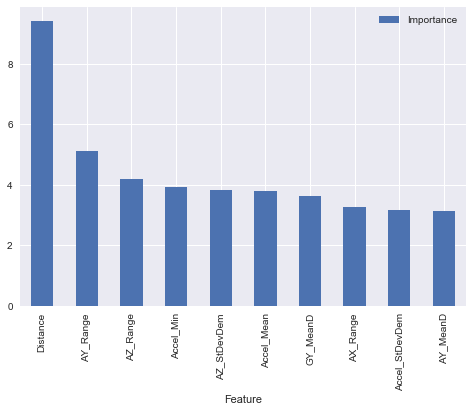

In [14]:
feats.loc[feats.Importance!=0,:].sort_values('Importance', ascending=False).set_index('Feature').\
iloc[0:10].plot(kind='bar')